# GemPy test models
This small presentation notebook will cover some simple models build in [GemPy](https://github.com/cgre-aachen/gempy) to showcase necessary inputs and the behaviour of some of its features.  
1. Minimum required input data  
2. How Series work  
    2.1 Model 2 layers in 1 Series  
    2.2 Model 2 layers in 2 Series  
3. Position of orientation data  
4. Fault relations  
5. Onlap relations  
6. Topography  

In [1]:
import sys, os
sys.path.append("../..")
import gempy as gp
%matplotlib inline

# Minimum required input data  
GemPy needs two different input data for creating a model: *interface* and *orientation* data. 
*Interfaces* can easily be understood as the ... well ... interface between two geological units. These can, e.g. be mapped in the Field.  
So can *Orientation* measurements (usually with a compass). They comprise two angles here, the `azimuth` $\sigma$ and `dip` $\varphi$  
![orientation_wiki](https://upload.wikimedia.org/wikipedia/commons/8/80/Streichbild.svg)  

| x  |  y |  z |  azimuth | dip  | polarity  |  Formation |
|--:|--:|--:|--:|--:|--:|---|
| 300  | 250  | 545  | 90  | 10  |  1 | sandstone  |
|  300 |  550 |  680 |  90 | 15  |  1 | limestone  |

## Minimum example  
The bare minimum to define an interface between two geological units is two *interface* points and one *orientation* point.

In [2]:
geo_model = gp.create_model('Simple_model')

In [3]:
gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = 'data/00_1Layer_simple_model_interfaces.csv',
            path_o = 'data/00_1Layer_simple_model_orientation.csv');

Active grids: ['regular']


In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,unit_2,Default series,1,#015482,1
1,basement,Basement,1,#9f0052,2


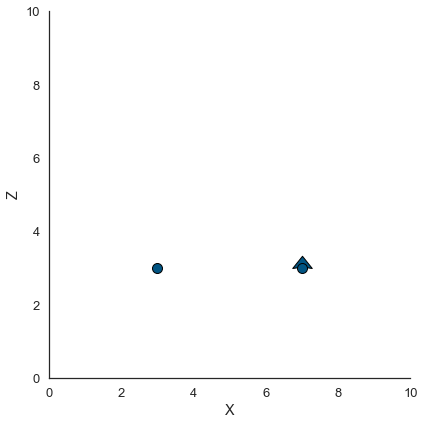

In [5]:
gp.plot.plot_data(geo_model)

In [6]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            1
          number series                              2
          number surfaces per series            [1, 0]
          len surfaces surface_points              [2]
          len series surface_points             [2, 0]
          len series orientations               [1, 0]
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                14.2829
          $C_o$                                4.85714
          drift equations                       [3, 0]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                           8
          centers                      [5.0, 1.0, 3.0]

In [7]:
geo_model.modify_kriging_parameters('drift equations', [0,0])

[0 0]
[0 0] drift equations
            range     $C_o$ drift equations  nugget grad  nugget scalar
values  14.282857  4.857143          [0, 0]         0.01       0.000001


In [8]:
geo_model.additional_data.kriging_data.df

,range,$C_o$,drift equations,nugget grad,nugget scalar
values,14.282857,4.857143,"[0, 0]",0.01,0.000001


In [9]:
geo_model.interpolator.theano_graph.n_universal_eq_T.get_value()

array([0], dtype=int32)

In [10]:
import numpy as np
geo_model.additional_data.kriging_data.df.at['values', 'drift equations'] = np.array([3, 2])
geo_model.additional_data.kriging_data.df


,range,$C_o$,drift equations,nugget grad,nugget scalar
values,14.282857,4.857143,"[3, 2]",0.01,0.000001


In [11]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [15]:
geo_model.interpolator.len_series_u

array([3], dtype=int32)

In [16]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            1
          number series                              2
          number surfaces per series            [1, 0]
          len surfaces surface_points              [2]
          len series surface_points             [2, 0]
          len series orientations               [1, 0]
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                14.2829
          $C_o$                                4.85714
          drift equations                       [3, 2]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                           8
          centers                      [5.0, 1.0, 3.0]

In [14]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False, set_solutions=True)

In [16]:
sol

[array([[2. , 2. , 2. , ..., 1. , 1.5, 1.5]]),
 array([[[2. , 2. , 2. , ..., 1. , 1.5, 1.5]]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([ 0.,  0.,  0.,  0., -0.,  0.,  1.]),
 array([[0.2627, 0.2877, 0.3127, ..., 2.7377, 1.0002, 1.0002]]),
 array([[1.0002]]),
 array([[ True,  True,  True, ...,  True,  True,  True]]),
 array([[False, False, False, ..., False, False, False]]),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan)]

In [17]:
sol

[array([[2. , 2. , 2. , ..., 1. , 1.5, 1.5]]),
 array([[[2. , 2. , 2. , ..., 1. , 1.5, 1.5]]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([ 0.,  0.,  0.,  0., -0.,  0.,  1.]),
 array([[0.2627, 0.2877, 0.3127, ..., 2.7377, 1.0002, 1.0002]]),
 array([[1.0002]]),
 array([[ True,  True,  True, ...,  True,  True,  True]]),
 array([[False, False, False, ..., False, False, False]]),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan),
 array(nan)]

In [18]:
geo_model.interpolator.theano_graph.n_universal_eq_T.get_value()

array([3], dtype=int32)

In [19]:
%debug

> /Users/varga/.conda/envs/gempy/lib/python3.7/codeop.py(133)__call__()
    131 
    132     def __call__(self, source, filename, symbol):
--> 133         codeob = compile(source, filename, symbol, self.flags, 1)
    134         for feature in _features:
    135             if codeob.co_flags & feature.compiler_flag:

ipdb> exit


In [20]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,3,1,3,0.2501,0.5001,0.5001,unit_2,Default series,1,1,0.000001
1,7,1,3,0.7501,0.5001,0.5001,unit_2,Default series,1,1,0.000001


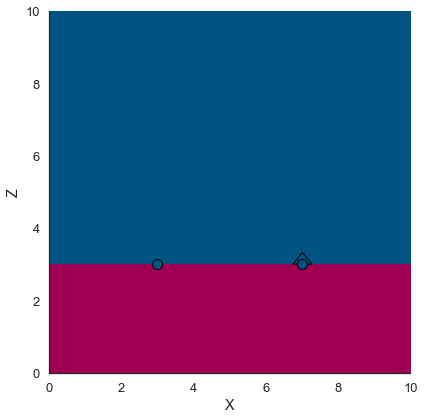

In [17]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

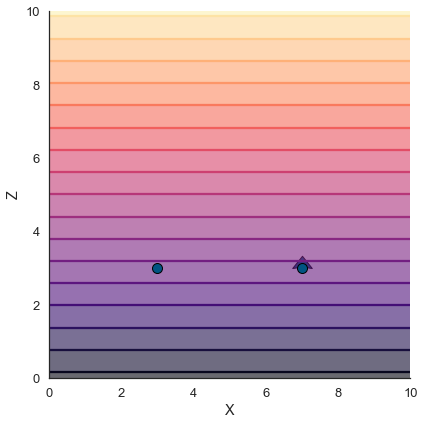

In [24]:
%matplotlib inline
gp.plot.plot_scalar_field(geo_model, cell_number=2, direction='y', show_data=True)

In [25]:
from gempy.plot.plot_api import plot_2d

121
1.0
0 1


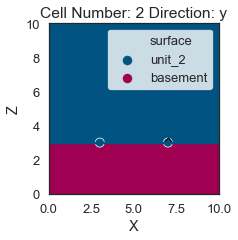

In [26]:
%matplotlib inline
plot_2d(geo_model, cell_number=[2])

In [27]:
geo_model.solutions.lith_block

array([2., 2., 2., ..., 1., 1., 1.])

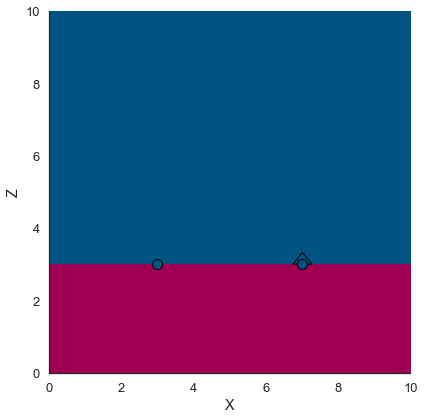

In [28]:
gp.plot.plot_section(geo_model, block=geo_model.solutions.block_matrix, cell_number=2, direction='y', show_data=True)

In [18]:
geo_model.solutions.mask_matrix

array([[ True,  True,  True, ...,  True,  True,  True]])

In [20]:
geo_model.interpolator.theano_graph.is_onlap.get_value()

array([0])

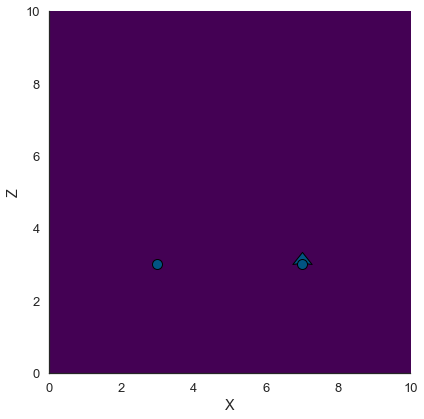

In [29]:
gp.plot.plot_section(geo_model, block=geo_model.solutions.mask_matrix, cell_number=2, direction='y', show_data=True)

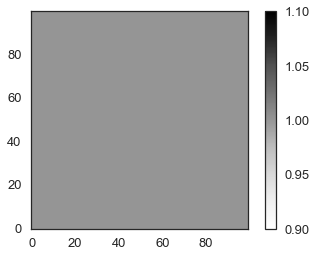

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(geo_model.solutions.mask_matrix.reshape(geo_model.grid.regular_grid.resolution)[:,2,:].T.astype('int'),
           origin='bottom')

plt.colorbar()

In [31]:
import numpy as np
geo_model.interpolator.theano_graph.is_erosion.set_value(np.array([0]))

In [32]:
geo_model.interpolator.theano_graph.is_onlap.get_value()

array([0])

In [33]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            1
          number series                              2
          number surfaces per series            [1, 0]
          len surfaces surface_points              [2]
          len series surface_points             [2, 0]
          len series orientations               [1, 0]
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                          [compare]
Kriging   range                                14.2829
          $C_o$                                4.85714
          drift equations                       [3, 2]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                           8
          centers                      [5.0, 1.0, 3.0]

In [34]:
import numpy as np
np.unique(geo_model.solutions.scalar_field_matrix)

array([0.2627, 0.2877, 0.3127, 0.3377, 0.3627, 0.3877, 0.4127, 0.4377,
       0.4627, 0.4877, 0.5127, 0.5377, 0.5627, 0.5877, 0.6127, 0.6377,
       0.6627, 0.6877, 0.7127, 0.7377, 0.7627, 0.7877, 0.8127, 0.8377,
       0.8627, 0.8877, 0.9127, 0.9377, 0.9627, 0.9877, 1.0127, 1.0377,
       1.0627, 1.0877, 1.1127, 1.1377, 1.1627, 1.1877, 1.2127, 1.2377,
       1.2627, 1.2877, 1.3127, 1.3377, 1.3627, 1.3877, 1.4127, 1.4377,
       1.4627, 1.4877, 1.5127, 1.5377, 1.5627, 1.5877, 1.6127, 1.6377,
       1.6627, 1.6877, 1.7127, 1.7377, 1.7627, 1.7877, 1.8127, 1.8377,
       1.8627, 1.8877, 1.9127, 1.9377, 1.9627, 1.9877, 2.0127, 2.0377,
       2.0627, 2.0877, 2.1127, 2.1377, 2.1627, 2.1877, 2.2127, 2.2377,
       2.2627, 2.2877, 2.3127, 2.3377, 2.3627, 2.3877, 2.4127, 2.4377,
       2.4627, 2.4877, 2.5127, 2.5377, 2.5627, 2.5877, 2.6127, 2.6377,
       2.6627, 2.6877, 2.7127, 2.7377])

## How Series work  
### A model with 2 layers in 1 Series
Extending the minimum example to a second set of interface points helps to test how `Series` work in GemPy.

In [35]:
geo_model = gp.create_model('2Layer_model')

In [36]:
gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = 'data/01_2Layer_simple_model_interfaces.csv',
            path_o = 'data/01_2Layer_simple_model_orientation.csv');

Active grids: ['regular']


In [37]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,unit_1,Default series,1,#015482,1
1,unit_2,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


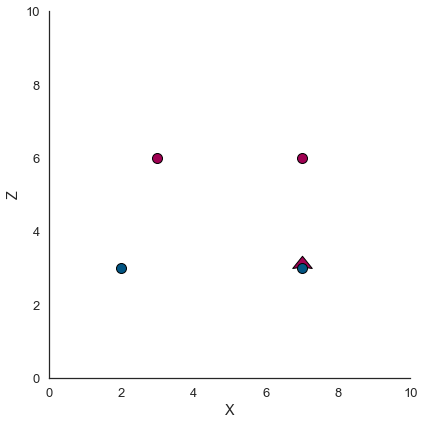

In [38]:
gp.plot.plot_data(geo_model)

In [39]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [40]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

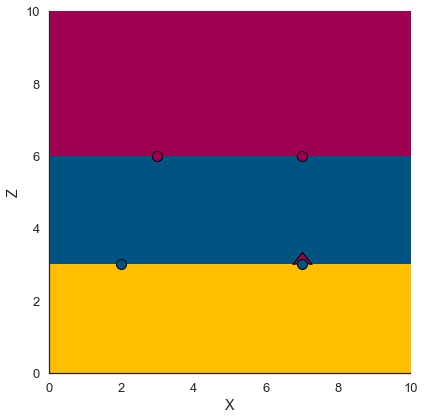

In [41]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

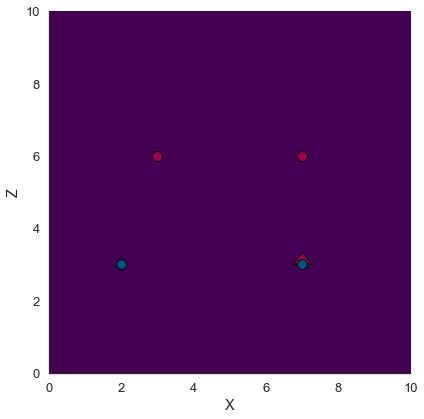

In [42]:
gp.plot.plot_section(geo_model, block=geo_model.solutions.mask_matrix, cell_number=2, direction='y', show_data=True)

This works only, because both layers are in the **same** Series, `default_series`.   
But what happens, if we define 2 series for the 2 units we have?

### A model with 2 layers in 2 series

In [43]:
gp.map_series_to_surfaces(geo_model,
                         {"Series_1": 'unit_1',
                         "Series_2": 'unit_2'})

,surface,series,order_surfaces,color,id
0,unit_1,Series_1,1,#015482,1
1,unit_2,Series_2,1,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [44]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [45]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,7,1,3,0.7501,0.5001,0.3501,1.000000e-12,1.000000e-12,1.0,0,90,1,unit_2,Series_2,2,2,0.01


In [46]:
# TODO: Check which theano parameter I have to update

In [47]:
geo_model.interpolator.non_zero

array([1])

In [48]:
geo_model.interpolator.set_theano_shared_loop()

In [49]:
geo_model.update_structure()

,values
isLith,True
isFault,False
number faults,0
number surfaces,2
number series,3
number surfaces per series,"[1, 1, 0]"
len surfaces surface_points,"[2, 2]"
len series surface_points,"[2, 2, 0]"
len series orientations,"[0, 1, 0]"


In [50]:
geo_model.interpolator.get_python_input_block()

[array([[0.7501, 0.5001, 0.3501]]),
 array([0.]),
 array([90.]),
 array([1.]),
 array([[0.2501, 0.5001, 0.3501],
        [0.7501, 0.5001, 0.3501],
        [0.3501, 0.5001, 0.6501],
        [0.7501, 0.5001, 0.6501]]),
 array([], shape=(0, 30002), dtype=float64),
 array([[0.0551    , 0.43343333, 0.0551    ],
        [0.0551    , 0.43343333, 0.0651    ],
        [0.0551    , 0.43343333, 0.0751    ],
        ...,
        [1.0451    , 0.56676667, 1.0251    ],
        [1.0451    , 0.56676667, 1.0351    ],
        [1.0451    , 0.56676667, 1.0451    ]]),
 array([[1., 2., 3.]]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  Tru

In [51]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)
## This will cause an error, and that is on purpose ##

ValueError: Input dimension mis-match. (input[0].shape[1] = 0, input[1].shape[1] = 1)
Apply node that caused the error: Elemwise{sub,no_inplace}(Subtensor{::, int64:int64:}.0, Subtensor{::, int64:int64:}.0)
Toposort index: 111
Inputs types: [TensorType(float64, matrix), TensorType(float64, matrix)]
Inputs shapes: [(0, 0), (0, 1)]
Inputs strides: [(240016, 8), (240016, 8)]
Inputs values: [array([], shape=(0, 0), dtype=float64), array([], shape=(0, 1), dtype=float64)]
Inputs type_num: [12, 12]
Outputs clients: [[Elemwise{add,no_inplace}(Elemwise{sub,no_inplace}.0, TensorConstant{(1, 1) of 0.0001})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "../../gempy/core/interpolator.py", line 1008, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "../../gempy/core/theano/theano_graph_pro.py", line 556, in theano_output
    solutions[:9] = self.compute_series()
  File "../../gempy/core/theano/theano_graph_pro.py", line 431, in compute_series
    profile=False
  File "/Users/varga/.conda/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "../../gempy/core/theano/theano_graph_pro.py", line 1879, in compute_a_series
    self.solve_kriging(b),
  File "../../gempy/core/theano/theano_graph_pro.py", line 1188, in solve_kriging
    C_matrix = self.covariance_matrix()
  File "../../gempy/core/theano/theano_graph_pro.py", line 1090, in covariance_matrix
    F_I, F_G = self.faults_matrix()
  File "../../gempy/core/theano/theano_graph_pro.py", line 1063, in faults_matrix
    F_I = (self.fault_drift_at_surface_points_ref - self.fault_drift_at_surface_points_rest) + 0.0001

Debugprint of the apply node: 
Elemwise{sub,no_inplace} [id A] <TensorType(float64, matrix)> ''   
 |Subtensor{::, int64:int64:} [id B] <TensorType(float64, matrix)> ''   
 | |Elemwise{mul,no_inplace} [id C] <TensorType(float64, matrix)> ''   
 | | |AdvancedSubtensor [id D] <TensorType(float64, matrix)> ''   
 | | | |<TensorType(float64, 3D)> [id E] <TensorType(float64, 3D)>
 | | | |Subtensor{int64} [id F] <TensorType(int64, vector)> ''   
 | | | | |Nonzero [id G] <TensorType(int64, matrix)> ''   
 | | | | | |Elemwise{Cast{int8}} [id H] <TensorType(int8, vector)> ''   
 | | | | |   |Subtensor{::, int8} [id I] <TensorType(int64, vector)> ''   
 | | | | |     |fault relation matrix_copy [id J] <TensorType(int64, matrix)>
 | | | | |     |ScalarFromTensor [id K] <int8> ''   
 | | | | |       |Elemwise{Cast{int8}} [id L] <TensorType(int8, scalar)> ''   
 | | | | |         |<TensorType(int32, scalar)> [id M] <TensorType(int32, scalar)>
 | | | | |Constant{0} [id N] <int64>
 | | | |TensorConstant{0} [id O] <TensorType(int64, scalar)>
 | | | |MakeSlice [id P] <slice> ''   
 | | |   |TensorConstant{0} [id Q] <TensorType(int8, scalar)>
 | | |   |Elemwise{add,no_inplace} [id R] <TensorType(int64, scalar)> ''   
 | | |   | |Elemwise{add,no_inplace} [id S] <TensorType(int64, scalar)> ''   
 | | |   | | |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
 | | |   | | | |Shape [id U] <TensorType(int64, vector)> ''   
 | | |   | | | | |Coordinates of the grid points to interpolate_copy [id V] <TensorType(float64, matrix)>
 | | |   | | | |Constant{0} [id N] <int64>
 | | |   | | |Elemwise{mul,no_inplace} [id W] <TensorType(int64, scalar)> ''   
 | | |   | |   |TensorConstant{2} [id X] <TensorType(int8, scalar)>
 | | |   | |   |Elemwise{sub,no_inplace} [id Y] <TensorType(int64, scalar)> ''   
 | | |   | |     |Subtensor{int64} [id Z] <TensorType(int64, scalar)> ''   
 | | |   | |     | |Shape [id BA] <TensorType(int64, vector)> ''   
 | | |   | |     | | |All the surface_points points at once_copy [id BB] <TensorType(float64, matrix)>
 | | |   | |     | |Constant{0} [id N] <int64>
 | | |   | |     |Subtensor{int64} [id BC] <TensorType(int64, scalar)> ''   
 | | |   | |       |Shape [id BD] <TensorType(int64, vector)> ''   
 | | |   | |       | |Number of points per surface used to split rest-ref_copy [id BE] <TensorType(int32, vector)>
 | | |   | |       |Constant{0} [id N] <int64>
 | | |   | |TensorConstant{0} [id Q] <TensorType(int8, scalar)>
 | | |   |NoneConst [id BF] <NoneTypeT>
 | | |InplaceDimShuffle{x,x} [id BG] <TensorType(float64, (True, True))> ''   
 | |   |<TensorType(float64, scalar)> [id BH] <TensorType(float64, scalar)>
 | |ScalarFromTensor [id BI] <int64> ''   
 | | |Elemwise{add,no_inplace} [id BJ] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{add,no_inplace} [id BK] <TensorType(int64, scalar)> ''   
 | |   | |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
 | |   | |Elemwise{sub,no_inplace} [id Y] <TensorType(int64, scalar)> ''   
 | |   |Length of surface_points in every series[t] [id BL] <TensorType(int32, scalar)>
 | |ScalarFromTensor [id BM] <int64> ''   
 |   |Elemwise{add,no_inplace} [id BN] <TensorType(int64, scalar)> ''   
 |     |Elemwise{add,no_inplace} [id BK] <TensorType(int64, scalar)> ''   
 |     |Length of surface_points in every series[t+1] [id BO] <TensorType(int32, scalar)>
 |Subtensor{::, int64:int64:} [id BP] <TensorType(float64, matrix)> ''   
   |Elemwise{mul,no_inplace} [id C] <TensorType(float64, matrix)> ''   
   |ScalarFromTensor [id BQ] <int64> ''   
   | |Elemwise{add,no_inplace} [id BR] <TensorType(int64, scalar)> ''   
   |   |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
   |   |Length of surface_points in every series[t] [id BL] <TensorType(int32, scalar)>
   |ScalarFromTensor [id BS] <int64> ''   
     |Elemwise{add,no_inplace} [id BT] <TensorType(int64, scalar)> ''   
       |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
       |Length of surface_points in every series[t+1] [id BO] <TensorType(int32, scalar)>

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Range, Covariance at 0, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, Attenuation factor, Sigmoid Outside, Sigmoid slope, <TensorType(int64, vector)>, <TensorType(bool, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 154
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int32, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(bool, 3D), TensorType(float64, 4D), TensorType(int32, vector), TensorType(int64, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(int64, vector), TensorType(bool, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2, 1, 1, 30002), (2, 7), (2, 1, 30002), (2, 1, 1), (2, 1, 30002), (2, 1, 30002), (2, 1, 1, 30002), (2,), (1, 1), (), (), (), (), (), (3,), (4,), (), (), (), (1,), (3,), (30000, 3), (4, 3), (1, 3), (1,), (1,), (1,), (1, 3)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (8,), (8,), (4,), (240016, 240016, 240016, 8), (56, 8), (240016, 240016, 8), (8, 8, 8), (30002, 30002, 1), (30002, 30002, 1), (240016, 240016, 240016, 8), (4,), (8, 8), (), (), (), (), (), (8,), (8,), (), (), (), (8,), (1,), (24, 8), (8, 32), (24, 8), (8,), (8,), (8,), (24, 8)]
Inputs values: [array(1), array([0], dtype=int32), array([1], dtype=int32), array([0], dtype=int32), array([1], dtype=int32), array([0], dtype=int32), array([7], dtype=int32), array([0], dtype=int32), array([1], dtype=int32), array([3], dtype=int32), array([ True]), array([ True]), array([ True]), array([0], dtype=int32), array([0]), array([0]), array([0], dtype=int32), 'not shown', 'not shown', 'not shown', array([[[0.]],

       [[0.]]]), 'not shown', 'not shown', 'not shown', array([1, 1], dtype=int32), array([[0]]), array(10.), array(2.), array(1.42828569), array(0.48571429), array(4.), array([0.01, 0.01, 0.01]), array([1.e-06, 1.e-06, 1.e-06, 1.e-06]), array(2.), array(50.), array(50000.), array([0]), array([False, False, False]), 'not shown', 'not shown', array([[0.7501, 0.5001, 0.3501]]), array([0.]), array([90.]), array([1.]), array([[1., 2., 3.]])]
Inputs type_num: [7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 7, 7, 5, 12, 12, 12, 12, 0, 0, 12, 5, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 7, 0, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.5, Constant{1})], []]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/Users/varga/.conda/envs/gempy/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/varga/.conda/envs/gempy/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-942bace18e87>", line 5, in <module>
    verbose=[])
  File "../../gempy/core/gempy_api.py", line 135, in set_interpolation_data
    return set_interpolator(*args, **kwargs)
  File "../../gempy/core/gempy_api.py", line 233, in set_interpolator
    geo_model.interpolator.compile_th_fn_geo(inplace=True, grid=grid)
  File "../../gempy/core/interpolator.py", line 1008, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "../../gempy/core/theano/theano_graph_pro.py", line 556, in theano_output
    solutions[:9] = self.compute_series()
  File "../../gempy/core/theano/theano_graph_pro.py", line 431, in compute_series
    profile=False

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Shape [id R] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id U] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id V] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BD] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BE] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BK] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BN] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | |Subtensor{int64} [id BP] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BQ] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | |Subtensor{int64} [id BS] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id BT] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | |   |Constant{0} [id T] <int64>
 | | | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | |   |Constant{0} [id T] <int64>
 | | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | |   |Constant{0} [id T] <int64>
 | | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CF] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id CG] <TensorType(int64, vector)> ''   
 | | |   |   |<TensorType(int64, vector)> [id CH] <TensorType(int64, vector)>
 | | |   |   |Constant{0} [id T] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id CI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CJ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CK] <TensorType(int64, vector)> ''   
 | |   |   |<TensorType(int64, vector)> [id CL] <TensorType(int64, vector)>
 | |   |   |Constant{0} [id T] <int64>
 | |   |Constant{0} [id T] <int64>
 | |TensorConstant{5000} [id CM] <TensorType(int64, scalar)>
 |Subtensor{:int64:} [id CN] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CP] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CQ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CR] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CS] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CT] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CU] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CW] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CX] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id CG] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id CK] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DE] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DF] <TensorType(float64, 4D)> ''   
 | |Alloc [id DG] <TensorType(float64, 4D)> ''   
 | | |TensorConstant{0.0} [id DH] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id DI] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DJ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DK] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DL] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DM] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DN] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id DO] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DK] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id DQ] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DK] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DR] <int64>
 | | |Subtensor{int64} [id DS] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DK] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DT] <int64>
 | |Rebroadcast{0} [id DL] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id DU] <int64> ''   
 |   |Subtensor{int64} [id DJ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id DV] <TensorType(float64, matrix)> ''   
 | |Alloc [id DW] <TensorType(float64, matrix)> ''   
 | | |TensorConstant{0.0} [id DX] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id DY] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DZ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EA] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EB] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EC] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id ED] <TensorType(float64, vector)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EE] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EA] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DP] <int64>
 | |Rebroadcast{0} [id EB] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id EF] <int64> ''   
 |   |Subtensor{int64} [id DZ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EG] <TensorType(float64, 3D)> ''   
 | |Alloc [id EH] <TensorType(float64, 3D)> ''   
 | | |TensorConstant{0.0} [id EI] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id EJ] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EK] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EL] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EM] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EN] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EO] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EP] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EL] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id EQ] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EL] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DR] <int64>
 | |Rebroadcast{0} [id EM] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id ER] <int64> ''   
 |   |Subtensor{int64} [id EK] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id ES] <TensorType(float64, 3D)> ''   
 | |Alloc [id ET] <TensorType(float64, 3D)> ''   
 | | |TensorConstant{0.0} [id EU] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id EV] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EW] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EX] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EY] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EZ] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id FA] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id FB] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id FC] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id FD] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int64, vector)> [id CH] <TensorType(int64, vector)>
 | | |   |       | |Constant{0} [id T] <int64>
 | | |   |       |Subtensor{int64} [id FE] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FF] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FG] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FH] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EX] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id FI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EX] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DR] <int64>
 | |Rebroadcast{0} [id EY] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FJ] <int64> ''   
 |   |Subtensor{int64} [id EW] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FK] <TensorType(bool, 3D)> ''   
 | |Alloc [id FL] <TensorType(bool, 3D)> ''   
 | | |TensorConstant{False} [id FM] <TensorType(bool, scalar)>
 | | |Elemwise{add,no_inplace} [id FN] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FP] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FQ] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FR] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FS] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FT] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FP] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FP] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DR] <int64>
 | |Rebroadcast{0} [id FQ] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id FV] <int64> ''   
 |   |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FW] <TensorType(bool, 3D)> ''   
 | |Alloc [id FX] <TensorType(bool, 3D)> ''   
 | | |TensorConstant{False} [id FY] <TensorType(bool, scalar)>
 | | |Elemwise{add,no_inplace} [id FZ] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id GA] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id GB] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id GC] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id GD] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id GE] <TensorType(bool, matrix)> ''   
 | | |   |       |mask matrix [id FS] <TensorType(bool, matrix)>
 | | |   |       |TensorConstant{(1, 1) of False} [id GF] <TensorType(bool, (True, True))>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id GG] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GB] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id GH] <TensorType(int64, scalar)> ''   
 | |   |Shape [id GB] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DR] <int64>
 | |Rebroadcast{0} [id GC] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id GI] <int64> ''   
 |   |Subtensor{int64} [id GA] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id GJ] <TensorType(float64, 4D)> ''   
 | |Alloc [id GK] <TensorType(float64, 4D)> ''   
 | | |TensorConstant{0.0} [id GL] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id GM] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id GN] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id GO] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id GP] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id GQ] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id GR] <TensorType(float64, 3D)> ''   
 | | |   |       |block matrix [id DN] <TensorType(float64, 3D)>
 | | |   |       |TensorConstant{(1, 1, 1) of 0.0} [id GS] <TensorType(float64, (True, True, True))>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id GT] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GO] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id GU] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GO] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DR] <int64>
 | | |Subtensor{int64} [id GV] <TensorType(int64, scalar)> ''   
 | |   |Shape [id GO] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DT] <int64>
 | |Rebroadcast{0} [id GP] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id GW] <int64> ''   
 |   |Subtensor{int64} [id GN] <TensorType(int64, scalar)> ''   
 |Number of points per surface used to split rest-ref [id GX] <TensorType(int32, vector)>
 |fault relation matrix [id GY] <TensorType(int64, matrix)>
 |<TensorType(float64, scalar)> [id GZ] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id HA] <TensorType(float64, scalar)>
 |Range [id HB] <TensorType(float64, scalar)>
 |Covariance at 0 [id HC] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id HD] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id HE] <TensorType(float64, vector)>
 |Nugget effect of scalar [id HF] <TensorType(float64, vector)>
 |Attenuation factor [id HG] <TensorType(float64, scalar)>
 |Sigmoid Outside [id HH] <TensorType(float64, scalar)>
 |Sigmoid slope [id HI] <TensorType(float64, scalar)>
 |<TensorType(int64, vector)> [id CH] <TensorType(int64, vector)>
 |<TensorType(bool, vector)> [id HJ] <TensorType(bool, vector)>
 |Coordinates of the grid points to interpolate [id HK] <TensorType(float64, matrix)>
 |All the surface_points points at once [id HL] <TensorType(float64, matrix)>
 |Position of the dips [id HM] <TensorType(float64, matrix)>
 |Angle of every dip [id HN] <TensorType(float64, vector)>
 |Azimuth [id HO] <TensorType(float64, vector)>
 |Polarity [id HP] <TensorType(float64, vector)>
 |Values that the blocks are taking [id HQ] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HR] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id HS] <TensorType(float64, 3D)> -> [id DF]
 > |if{} [id HT] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id HU] <TensorType(bool, scalar)> -> [id CZ]
 > | |if{} [id HV] <TensorType(float64, matrix)> ''   
 > | | |The series (fault) is finite[t] [id HW] <TensorType(int32, scalar)> -> [id DA]
 > | | |Sum{axis=[0], acc_dtype=float64} [id HX] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id HY] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id HZ] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id HS] <TensorType(float64, 3D)> -> [id DF]
 > |   |ScalarFromTensor [id IA] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id IB] <TensorType(int32, scalar)> -> [id DD]
 > |ScalarFromTensor [id IA] <int32> ''   
 > |Constant{0} [id IC] <int8>
 > |ScalarFromTensor [id ID] <int64> ''   
 >   |Elemwise{add,no_inplace} [id IE] <TensorType(int64, scalar)> ''   
 >     |Elemwise{add,no_inplace} [id IF] <TensorType(int64, scalar)> ''   
 >     | |Subtensor{int64} [id IG] <TensorType(int64, scalar)> ''   
 >     | | |Shape [id IH] <TensorType(int64, vector)> ''   
 >     | | | |Coordinates of the grid points to interpolate_copy [id II] <TensorType(float64, matrix)> -> [id HK]
 >     | | |Constant{0} [id IJ] <int64>
 >     | |Elemwise{mul,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 >     |   |TensorConstant{2} [id IL] <TensorType(int8, scalar)>
 >     |   |Elemwise{sub,no_inplace} [id IM] <TensorType(int64, scalar)> ''   
 >     |     |Subtensor{int64} [id IN] <TensorType(int64, scalar)> ''   
 >     |     | |Shape [id IO] <TensorType(int64, vector)> ''   
 >     |     | | |All the surface_points points at once_copy [id IP] <TensorType(float64, matrix)> -> [id HL]
 >     |     | |Constant{0} [id IJ] <int64>
 >     |     |Subtensor{int64} [id IQ] <TensorType(int64, scalar)> ''   
 >     |       |Shape [id IR] <TensorType(int64, vector)> ''   
 >     |       | |Number of points per surface used to split rest-ref_copy [id IS] <TensorType(int32, vector)> -> [id GX]
 >     |       |Constant{0} [id IJ] <int64>
 >     |TensorConstant{0} [id IT] <TensorType(int8, scalar)>
 >IncSubtensor{Set;int32:int32:} [id IU] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id IV] <TensorType(float64, vector)> -> [id DV]
 > |if{} [id IW] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id IX] <TensorType(bool, scalar)> -> [id CX]
 > | |Reshape{1} [id IY] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id IZ] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id IV] <TensorType(float64, vector)> -> [id DV]
 > |   |ScalarFromTensor [id JA] <int32> ''   
 > |   | |Length of weights in every series[t] [id JB] <TensorType(int32, scalar)> -> [id CS]
 > |   |ScalarFromTensor [id JC] <int32> ''   
 > |     |Length of weights in every series[t+1] [id JD] <TensorType(int32, scalar)> -> [id CT]
 > |ScalarFromTensor [id JA] <int32> ''   
 > |ScalarFromTensor [id JC] <int32> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JE] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id JF] <TensorType(float64, matrix)> -> [id EG]
 > |if{} [id JG] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id JH] <TensorType(bool, scalar)> -> [id CY]
 > | |Subtensor{int64} [id JI] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id JJ] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id JF] <TensorType(float64, matrix)> -> [id EG]
 > |   |ScalarFromTensor [id IA] <int32> ''   
 > |ScalarFromTensor [id IA] <int32> ''   
 > |Constant{0} [id IC] <int8>
 > |ScalarFromTensor [id ID] <int64> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JK] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id JL] <TensorType(float64, matrix)> -> [id ES]
 > |AdvancedSubtensor1 [id JM] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id JN] <TensorType(float64, vector)> ''   
 > | | |if{} [id JG] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id JO] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id JP] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id JQ] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id IM] <TensorType(int64, scalar)> ''   
 > | | |ScalarFromTensor [id JR] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id JS] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id IM] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id JT] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id JU] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id JV] <int32> ''   
 > |   | |List with the number of surfaces[t] [id JW] <TensorType(int32, scalar)> -> [id CU]
 > |   |ScalarFromTensor [id JX] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id JY] <TensorType(int32, scalar)> -> [id CV]
 > |<TensorType(int32, scalar)> [id IB] <TensorType(int32, scalar)> -> [id DD]
 > |Elemwise{sub,no_inplace} [id JZ] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id KA] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id KB] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id JV] <int32> ''   
 >   | |ScalarFromTensor [id JX] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id KC] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int64:int32:, int8:int64:} [id KE] <TensorType(bool, matrix)> ''   
 > | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KF] <TensorType(bool, matrix)> ''   
 > | | |mask matrix[t-1] [id KG] <TensorType(bool, matrix)> -> [id FK]
 > | | |if{} [id KH] <TensorType(bool, vector)> ''   
 > | | | |<TensorType(int64, scalar)> [id KI] <TensorType(int64, scalar)> -> [id DC]
 > | | | |Elemwise{gt,no_inplace} [id KJ] <TensorType(bool, vector)> ''   
 > | | | | |if{} [id JG] <TensorType(float64, vector)> ''   
 > | | | | |InplaceDimShuffle{x} [id KK] <TensorType(float64, (True,))> ''   
 > | | | |   |MaxAndArgmax{axis=(0,)}.0 [id KL] <TensorType(float64, scalar)> 'max'   
 > | | | |Subtensor{int32, int8:int64:} [id KM] <TensorType(bool, vector)> ''   
 > | | |   |mask matrix[t-1] [id KG] <TensorType(bool, matrix)> -> [id FK]
 > | | |   |ScalarFromTensor [id KN] <int32> ''   
 > | | |   | |Elemwise{sub,no_inplace} [id KO] <TensorType(int32, scalar)> ''   
 > | | |   |   |<TensorType(int32, scalar)> [id IB] <TensorType(int32, scalar)> -> [id DD]
 > | | |   |   |TensorConstant{1} [id KP] <TensorType(int8, scalar)>
 > | | |   |Constant{0} [id IC] <int8>
 > | | |   |ScalarFromTensor [id ID] <int64> ''   
 > | | |ScalarFromTensor [id KN] <int32> ''   
 > | | |ScalarFromTensor [id IA] <int32> ''   
 > | | |Constant{0} [id IC] <int8>
 > | | |ScalarFromTensor [id ID] <int64> ''   
 > | |Subtensor{::int64} [id KQ] <TensorType(bool, matrix)> ''   
 > | | |CumOp{0, mul} [id KR] <TensorType(bool, matrix)> ''   
 > | | | |Subtensor{::int64} [id KS] <TensorType(bool, matrix)> ''   
 > | | |   |Subtensor{int64:int32:, int8:int64:} [id KT] <TensorType(bool, matrix)> ''   
 > | | |   | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KF] <TensorType(bool, matrix)> ''   
 > | | |   | |ScalarFromTensor [id KU] <int64> ''   
 > | | |   | | |Elemwise{sub,no_inplace} [id KV] <TensorType(int64, scalar)> ''   
 > | | |   | |   |<TensorType(int32, scalar)> [id IB] <TensorType(int32, scalar)> -> [id DD]
 > | | |   | |   |MaxAndArgmax{axis=(0,)}.0 [id KW] <TensorType(int64, scalar)> 'max'   
 > | | |   | |ScalarFromTensor [id IA] <int32> ''   
 > | | |   | |Constant{0} [id IC] <int8>
 > | | |   | |ScalarFromTensor [id ID] <int64> ''   
 > | | |   |Constant{-1} [id KX] <int64>
 > | | |Constant{-1} [id KX] <int64>
 > | |ScalarFromTensor [id KU] <int64> ''   
 > | |ScalarFromTensor [id IA] <int32> ''   
 > | |Constant{0} [id IC] <int8>
 > | |ScalarFromTensor [id ID] <int64> ''   
 > |if{} [id KY] <TensorType(bool, vector)> ''   
 > | |<TensorType(int64, scalar)> [id KZ] <TensorType(int64, scalar)> -> [id DB]
 > | |Elemwise{gt,no_inplace} [id LA] <TensorType(bool, vector)> ''   
 > | | |if{} [id JG] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id LB] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id LC] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id LD] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id LE] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id LF] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id LG] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id LH] <TensorType(bool, scalar)> ''   
 > |   |     |<TensorType(bool, vector)> [id LI] <TensorType(bool, vector)> -> [id HJ]
 > |   |     |ScalarFromTensor [id IA] <int32> ''   
 > |   |Elemwise{second,no_inplace} [id LJ] <TensorType(bool, vector)> ''   
 > |     |if{} [id JG] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id LK] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id IA] <int32> ''   
 > |Constant{0} [id IC] <int8>
 > |ScalarFromTensor [id ID] <int64> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LL] <TensorType(bool, matrix)> ''   
 > |<TensorType(bool, matrix)> [id LM] <TensorType(bool, matrix)> -> [id FW]
 > |Elemwise{add,no_inplace} [id LN] <TensorType(bool, vector)> ''   
 > | |if{} [id KY] <TensorType(bool, vector)> ''   
 > | |if{} [id LO] <TensorType(bool, vector)> ''   
 > |   |Subtensor{int32} [id LH] <TensorType(bool, scalar)> ''   
 > |   |Elemwise{gt,no_inplace} [id LA] <TensorType(bool, vector)> ''   
 > |   |Elemwise{second,no_inplace} [id LP] <TensorType(bool, vector)> ''   
 > |     |if{} [id JG] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of False} [id LQ] <TensorType(bool, (True,))>
 > |Elemwise{mul,no_inplace} [id LR] <TensorType(bool, vector)> ''   
 > | |Subtensor{:int64:} [id LS] <TensorType(bool, vector)> ''   
 > | | |<TensorType(bool, vector)> [id LI] <TensorType(bool, vector)> -> [id HJ]
 > | | |ScalarFromTensor [id LT] <int64> ''   
 > | |   |Subtensor{int64} [id LU] <TensorType(int64, scalar)> ''   
 > | |     |Shape [id LV] <TensorType(int64, vector)> ''   
 > | |     | |<TensorType(int64, vector)> [id LW] <TensorType(int64, vector)> -> [id CH]
 > | |     |Constant{0} [id IJ] <int64>
 > | |Elemwise{invert,no_inplace} [id LX] <TensorType(bool, vector)> ''   
 > |   |Elemwise{Cast{bool}} [id LY] <TensorType(bool, vector)> ''   
 > |     |Subtensor{:int64:} [id LZ] <TensorType(int64, vector)> ''   
 > |       |Subtensor{::, int8} [id MA] <TensorType(int64, vector)> ''   
 > |       | |fault relation matrix_copy [id MB] <TensorType(int64, matrix)> -> [id GY]
 > |       | |ScalarFromTensor [id MC] <int8> ''   
 > |       |   |Elemwise{Cast{int8}} [id MD] <TensorType(int8, scalar)> ''   
 > |       |     |<TensorType(int32, scalar)> [id IB] <TensorType(int32, scalar)> -> [id DD]
 > |       |ScalarFromTensor [id LT] <int64> ''   
 > |MakeSlice [id ME] <slice> ''   
 >   |TensorConstant{0} [id IT] <TensorType(int8, scalar)>
 >   |Elemwise{add,no_inplace} [id IE] <TensorType(int64, scalar)> ''   
 >   |NoneConst [id MF] <NoneTypeT>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MG] <TensorType(float64, 3D)> ''   
 > |<TensorType(float64, 3D)> [id MH] <TensorType(float64, 3D)> -> [id GJ]
 > |if{} [id HT] <TensorType(float64, matrix)> ''   
 > |ScalarFromTensor [id IA] <int32> ''   
 > |Constant{0} [id IC] <int8>
 > |ScalarFromTensor [id ID] <int64> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HR] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IU] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JE] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JK] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LL] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MG] <TensorType(float64, 3D)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HR] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IU] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JE] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JK] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LL] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MG] <TensorType(float64, 3D)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HR] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IU] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JE] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JK] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LL] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MG] <TensorType(float64, 3D)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HR] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IU] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JE] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JK] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LL] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MG] <TensorType(float64, 3D)> ''   

for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HR] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IU] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JE] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JK] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LL] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MG] <TensorType(float64, 3D)> ''   

for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HR] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id IU] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JE] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JK] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KD] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id LL] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MG] <TensorType(float64, 3D)> ''   

Storage map footprint:
 - Coordinates of the grid points to interpolate, Input, Shape: (30000, 3), ElemSize: 8 Byte(s), TotalSize: 720000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - for{cpu,Looping}.0, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - for{cpu,Looping}.2, Shape: (2, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - for{cpu,Looping}.6, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - block matrix, Shared Input, Shape: (1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 240016 Byte(s)
 - Scalar matrix, Shared Input, Shape: (1, 30002), ElemSize: 8 Byte(s), TotalSize: 240016 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - for{cpu,Looping}.4, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - for{cpu,Looping}.5, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - mask matrix, Shared Input, Shape: (1, 30002), ElemSize: 1 Byte(s), TotalSize: 30002 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 7), ElemSize: 8 Byte(s), TotalSize: 112 Byte(s)
 - for{cpu,Looping}.1, Shape: (2, 7), ElemSize: 8 Byte(s), TotalSize: 112 Byte(s)
 - All the surface_points points at once, Input, Shape: (4, 3), ElemSize: 8 Byte(s), TotalSize: 96 Byte(s)
 - Weights vector, Shared Input, Shape: (7,), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (4,), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - Position of the dips, Input, Shape: (1, 3), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 3), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - for{cpu,Looping}.3, Shape: (2, 1, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Angle of every dip, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Azimuth, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Polarity, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - fault relation matrix, Shared Input, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Attenuation factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid Outside, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid slope, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1, 1) of 0.0}, Shape: (1, 1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (3,), ElemSize: 1 Byte(s), TotalSize: 3 Byte(s)
 - TensorConstant{(1, 1) of False}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{False}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{False}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 30002), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 4374116.0 Byte(s) 0.004 GB
 TotalSize inputs: 1253585.0 Byte(s) 0.001 GB



In [ ]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This shows that one *orientation* is still enough for modeling 2 layers, **if** these are arranged in the same [Series](https://gempy.readthedocs.io/Data/data.Series.html#data.Series). Generally however, each unit should have **at least** two *interface* points and one *orientation* point.

### A model with 2 layers in 2 Series  
#### ... and enough input data

In [ ]:
geo_model = gp.create_model('2layers_2series')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = 'data/02_2Layer_simple_model_interfaces.csv',
            path_o = 'data/02_2Layer_simple_model_2orientation.csv');

In [ ]:
geo_model.surfaces

Note that both units belong to the same Series here (`Default series`).

In [ ]:
gp.plot.plot_data(geo_model)

In [ ]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

In [ ]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

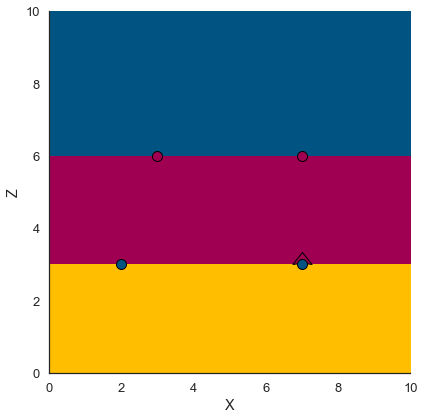

In [52]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This model doesn't change, when we switch the formation of the orientations. Right now, the orientation point at Z=6 belongs to *unit_2* and the orientation point at Z=3 to *unit_1*. Let's switch those:

In [53]:
geo_model = gp.create_model('2layers_2series')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = 'data/02_2Layer_simple_model_interfaces.csv',
            path_o = 'data/02_2Layer_simple_model_2orientation2.csv');
geo_model.orientations

Active grids: ['regular']


,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,7,1,6,0.7501,0.5001,0.6501,1.000000e-12,1.000000e-12,1.000000,0,90,1,unit_1,Default series,1,1,0.01
1,7,1,3,0.7501,0.5001,0.3501,7.071068e-01,1.000043e-12,0.707107,45,90,1,unit_2,Default series,2,1,0.01


In [54]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [55]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

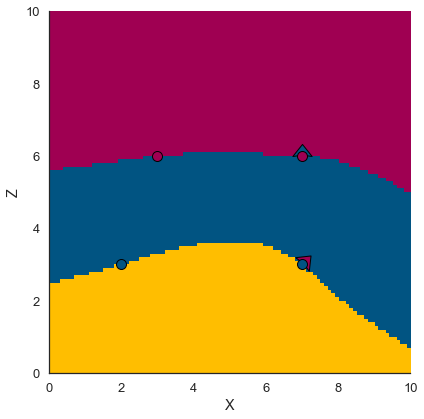

In [56]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This changes however, if we assign the units to different series. Looking at the orientation data in the example, this is reasonable, as units in one series share the interpolation parameters. So, comprising units in a series is logical if they have a comparable spatial trend / geometry.

In [57]:
gp.map_series_to_surfaces(geo_model,
                         {"Series_2": 'unit_2',
                         "Series_1": 'unit_1'})

,surface,series,order_surfaces,color,id
1,unit_2,Series_2,1,#9f0052,1
0,unit_1,Series_1,1,#015482,2
2,basement,Basement,1,#ffbe00,3


In [58]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [59]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

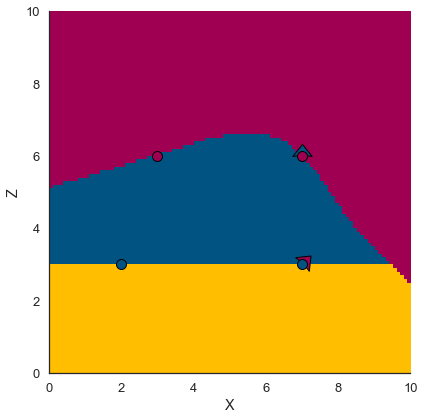

In [60]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

# Position of Orientation Data
*Orientation* data defines the underlying gradient field (its direction) and its location is important for the resulting model. In the following, we change the depth of *orientation* data points in the model:

In [61]:
geo_model_shallow = gp.create_model('shallow_orientation')

In [62]:
gp.init_data(geo_model_shallow, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = 'data/03_2Layer_simple_model_interfaces.csv',
            path_o = 'data/03_2Layer_simple_model_2orientation_shallow.csv');

Active grids: ['regular']


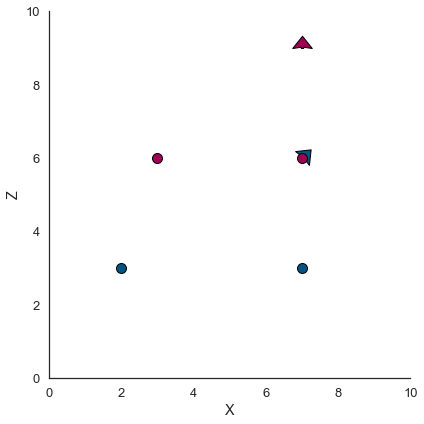

In [63]:
gp.plot.plot_data(geo_model_shallow)

In [64]:
geo_model_deep = gp.create_model('deep_orientation')

In [65]:
gp.init_data(geo_model_deep, [0, 10., 0, 2., 0, 10.], [100, 3, 100],
            path_i = 'data/03_2Layer_simple_model_interfaces.csv',
            path_o = 'data/03_2Layer_simple_model_2orientation_deep.csv', default_values=True);

Active grids: ['regular']


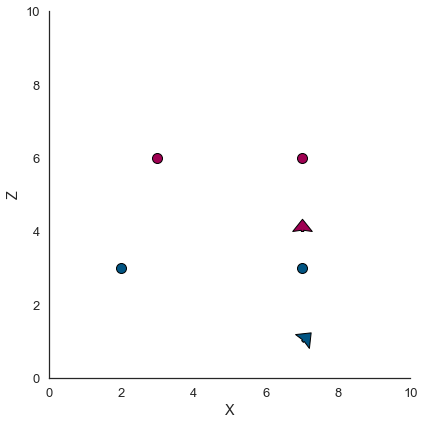

In [66]:
gp.plot.plot_data(geo_model_deep)

In [67]:
# Create the theano model
gp.set_interpolation_data(geo_model_shallow,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [68]:
# Compute the model
sol = gp.compute_model(geo_model_shallow, compute_mesh=False)

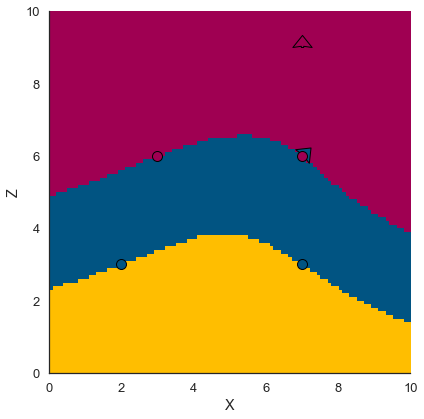

In [69]:
gp.plot.plot_section(geo_model_shallow, cell_number=2, direction='y', show_data=True)

In [70]:
# Create the theano model
gp.set_interpolation_data(geo_model_deep,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [71]:
# Compute the model
sol = gp.compute_model(geo_model_deep, compute_mesh=False)

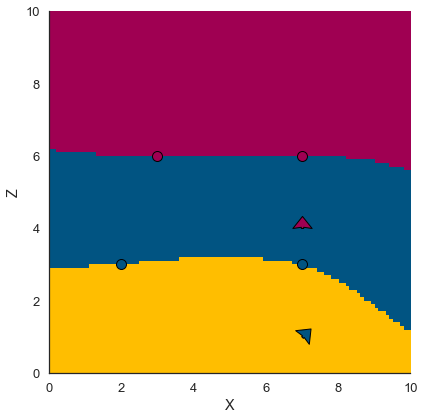

In [72]:
gp.plot.plot_section(geo_model_deep, cell_number=2, direction='y', show_data=True)

# Fault relations 
Let's introduce a common feature of geological models: faults. Faults are discontinuities, displacing rock units. In GemPy, Faults are modeled similarly to geologcial units, but distort the potential field of geological units. The result is the fault displacement.

In [73]:
geo_model = gp.create_model('2layers_2faults')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = 'data/04_2Layers_2Faults_interfaces.csv',
            path_o = 'data/04_2Layers_2Faults_orientations.csv');

Active grids: ['regular']


In [74]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,unit_1,Default series,1,#015482,1
1,unit_2,Default series,2,#9f0052,2
2,fault1,Default series,3,#ffbe00,3
3,fault2,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


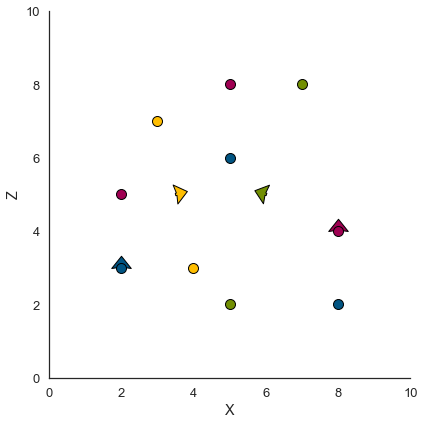

In [75]:
gp.plot.plot_data(geo_model)

In [76]:
gp.map_series_to_surfaces(geo_model,
                         {"Fault2_series":'fault2',
                          "Fault1_series":'fault1',
                          "Strati_series":('unit_2', 'unit_1')})

,surface,series,order_surfaces,color,id
3,fault2,Fault2_series,1,#728f02,1
2,fault1,Fault1_series,1,#ffbe00,2
0,unit_1,Strati_series,1,#015482,3
1,unit_2,Strati_series,2,#9f0052,4
4,basement,Basement,1,#443988,5


In [77]:
geo_model.set_is_fault(['Fault1_series', 'Fault2_series'], change_color=False)
#geo_model.set_is_finite_fault(series_fault=['Fault2_series'], toggle=True)

,isFault,isFinite
Fault2_series,True,False
Fault1_series,True,False
Strati_series,False,False
Basement,False,False


In [78]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!


In [79]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

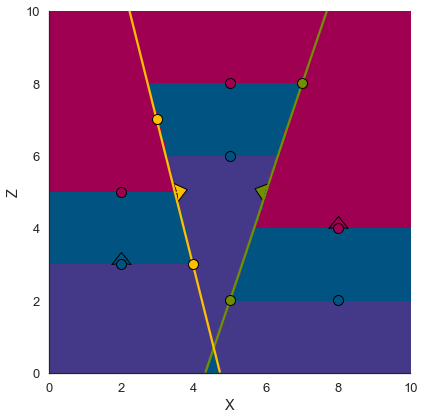

In [80]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

We see that faults cross cut at the bottom without displacement. This is not realistic and also causes an error in the model (unit one is modeled between the faults. We can, however, set fault relations:

In [81]:
# table of fault relations
geo_model.faults.faults_relations_df

,Fault2_series,Fault1_series,Strati_series,Basement
Fault2_series,False,False,True,True
Fault1_series,False,False,True,True
Strati_series,False,False,False,False
Basement,False,False,False,False


In [82]:
import numpy as np
fr = np.array([[False, True, True, True],
               [False, False, True, True],
               [False, False, False, False],
               [False, False, False, False]])

In [83]:
geo_model.set_fault_relation(fr)

,Fault2_series,Fault1_series,Strati_series,Basement
Fault2_series,False,True,True,True
Fault1_series,False,False,True,True
Strati_series,False,False,False,False
Basement,False,False,False,False


In [84]:
geo_model.set_fault_relation??

In [85]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!


In [86]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

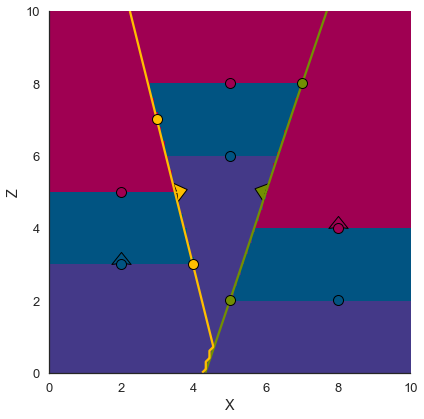

In [87]:
gp.plot.plot_section(geo_model, cell_number=1, direction='y', show_data=True)

## Onlap test

In [88]:
geo_model = gp.create_model('Test_model')

In [89]:
gp.init_data(geo_model, [0, 10., 0, 2., 0, 5.], [100, 3, 100],
            path_o = 'data/05_toy_fold_unconformity_orientations.csv',
             path_i = 'data/05_toy_fold_unconformity_interfaces.csv', default_values=True);

Active grids: ['regular']


In [90]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Basefold,Default series,1,#015482,1
1,Topfold,Default series,2,#9f0052,2
2,Inclined,Default series,3,#ffbe00,3
3,Flat,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [91]:
gp.map_series_to_surfaces(geo_model,
                         {"Flat_Series":'Flat',
                          "Inclined_Series":'Inclined',
                          "Fold_Series": ('Basefold', 'Topfold', 'basement')})

,surface,series,order_surfaces,color,id
3,Flat,Flat_Series,1,#728f02,1
2,Inclined,Inclined_Series,1,#ffbe00,2
0,Basefold,Fold_Series,1,#015482,3
1,Topfold,Fold_Series,2,#9f0052,4
4,basement,Fold_Series,3,#443988,5


In [92]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
3,Flat,Flat_Series,1,#728f02,1
2,Inclined,Inclined_Series,1,#ffbe00,2
0,Basefold,Fold_Series,1,#015482,3
1,Topfold,Fold_Series,2,#9f0052,4
4,basement,Fold_Series,3,#443988,5


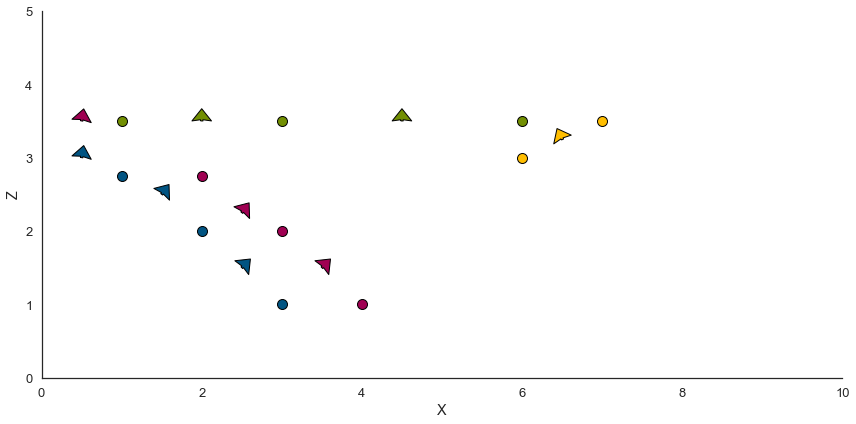

In [93]:
gp.plot.plot_data(geo_model, direction='y')

In [94]:
geo_model.series

,order_series,BottomRelation
Flat_Series,1,Erosion
Inclined_Series,2,Erosion
Fold_Series,3,Erosion


In [95]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [96]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

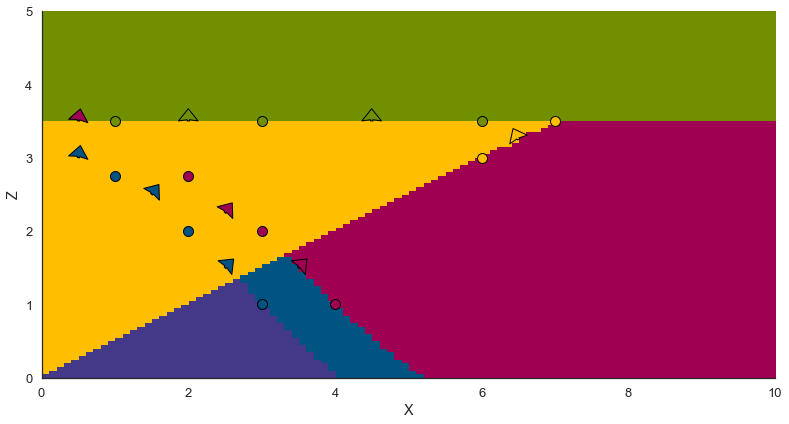

In [97]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

## Inclined as ONLAP

In [98]:
# so let's set the Pregraben_Series to Onlap
geo_model.set_bottom_relation('Inclined_Series', bottom_relation='Onlap')
geo_model.set_bottom_relation('Flat_Series', bottom_relation='Erosion')

,order_series,BottomRelation
Flat_Series,1,Erosion
Inclined_Series,2,Onlap
Fold_Series,3,Erosion


In [99]:
# # Create the theano model
# gp.set_interpolation_data(geo_model,
#                          compile_theano=True,
#                          theano_optimizer='fast_compile',
#                          verbose=[])
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

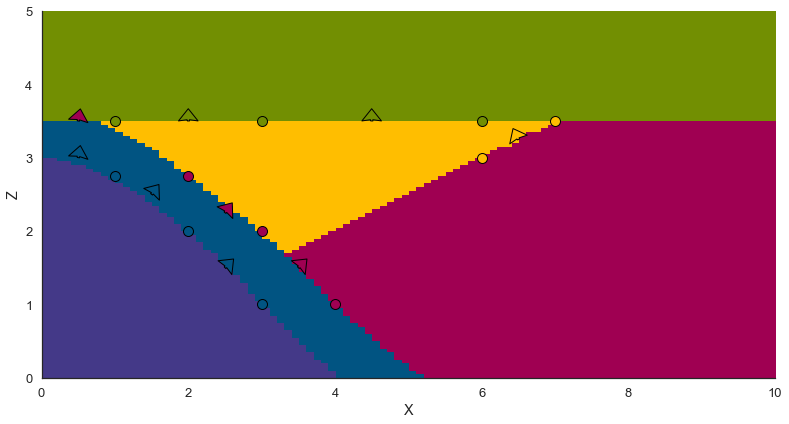

In [100]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

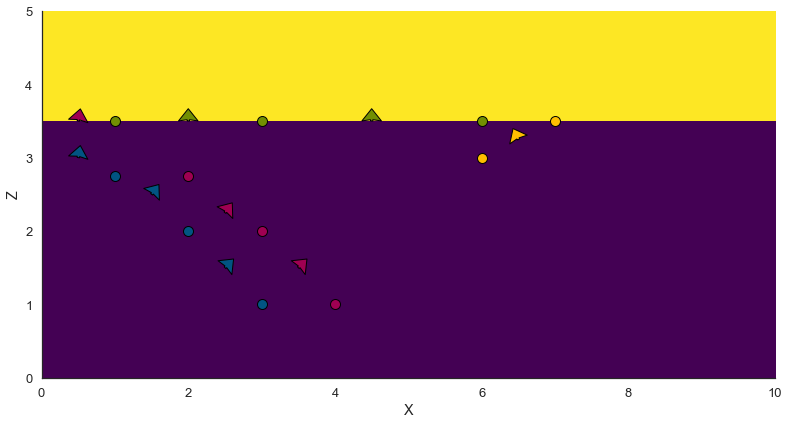

In [101]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[0])

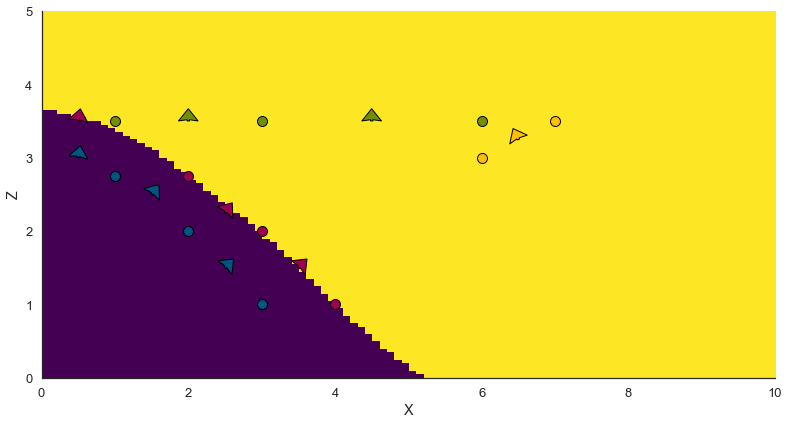

In [102]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[1])

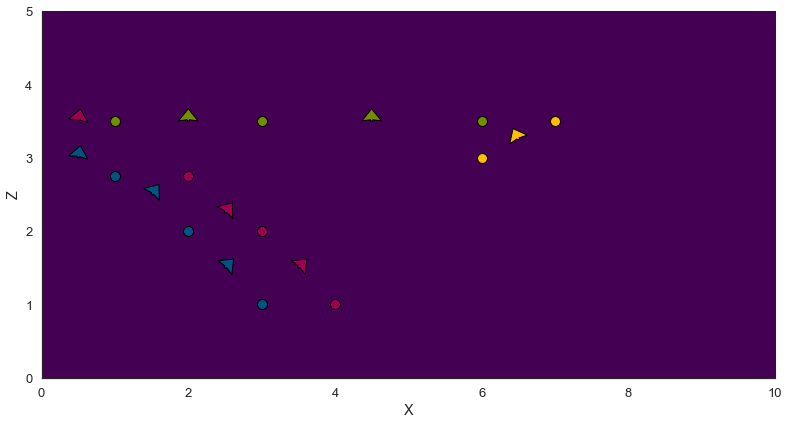

In [103]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[2])

## Inclined and Flat as ONLAP

In [104]:
# so let's set the Pregraben_Series to Onlap
geo_model.set_bottom_relation(['Flat_Series','Inclined_Series'], bottom_relation='Onlap')

,order_series,BottomRelation
Flat_Series,1,Onlap
Inclined_Series,2,Onlap
Fold_Series,3,Erosion


In [105]:
# Create the theano model
# gp.set_interpolation_data(geo_model,
#                          compile_theano=True,
#                          theano_optimizer='fast_compile',
#                          verbose=[])

In [106]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

In [107]:
a = geo_model.interpolator.theano_graph.is_onlap.get_value()
a

array([0, 1, 1])

In [108]:
b = geo_model.interpolator.theano_graph.is_erosion.get_value()
b

array([0, 0, 0])

In [109]:
geo_model.interpolator.theano_graph.is_erosion.set_value(np.array([1,0,0]))

In [110]:
c = np.arange(3)
c

array([0, 1, 2])

In [111]:
c[a.astype(bool)]

array([1, 2])

In [112]:
c[b.astype(bool)]

array([], dtype=int64)

In [113]:
b = np.array([0, 1, 0, 1, 1, 0, 0])

In [114]:
a = np.array([0, 0, 1, 0, 0, 1, 1])

In [115]:
np.array([0, ])

array([0])

In [116]:
np.cumsum(a)

array([0, 0, 1, 1, 1, 2, 3])

In [117]:
np.cumsum(b)

array([0, 1, 1, 2, 3, 3, 3])

In [118]:
np.nonzero(b[:4])[0].max()

3

In [119]:
np.argmax(b)

1

In [120]:
n_series = 6+1

b[:n_series] - a[:n_series], np.cumsum(b[:n_series] - a[:n_series])

(array([ 0,  1, -1,  1,  1, -1, -1]), array([0, 1, 0, 1, 2, 1, 0]))

In [121]:
b

array([0, 1, 0, 1, 1, 0, 0])

In [122]:
ie = geo_model.interpolator.theano_graph.is_erosion.get_value()

In [123]:
ie[:1]

array([1])

In [124]:
np.nonzero(ie)

(array([0]),)

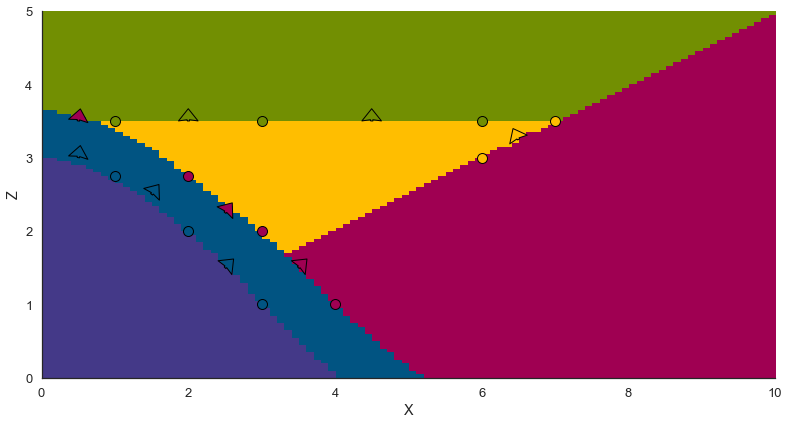

In [125]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

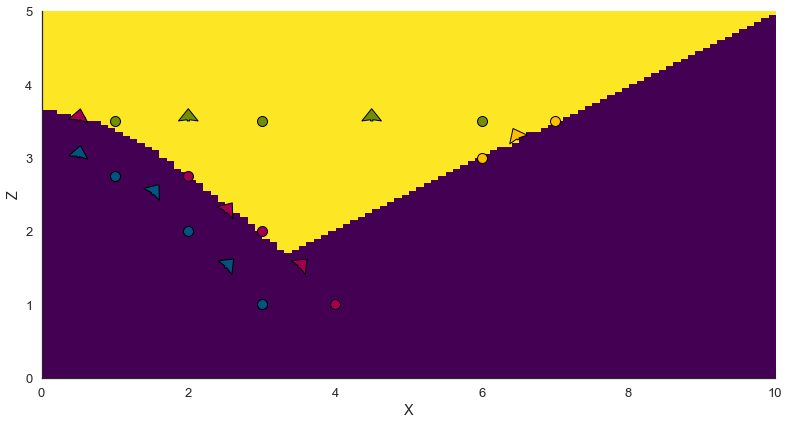

In [126]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[0])

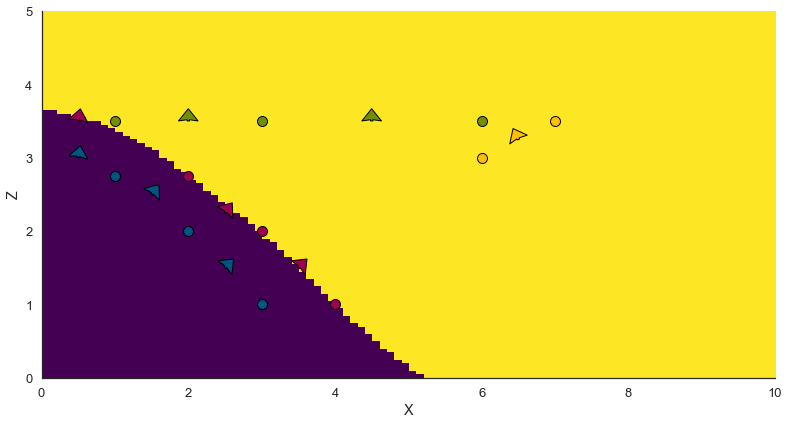

In [127]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[1])

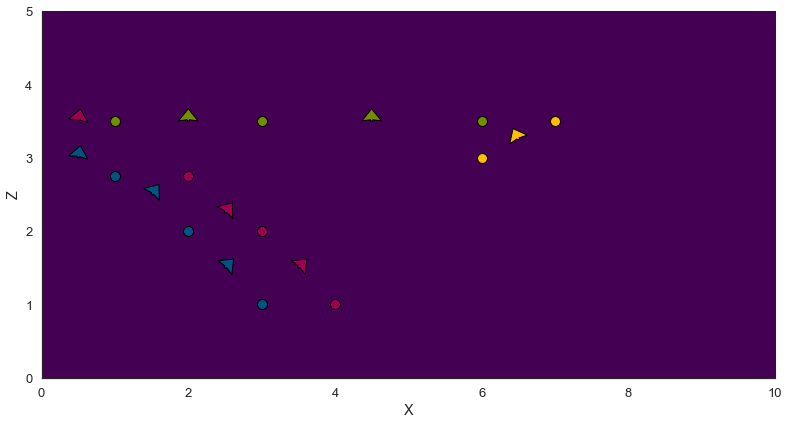

In [128]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[2])